Using Library

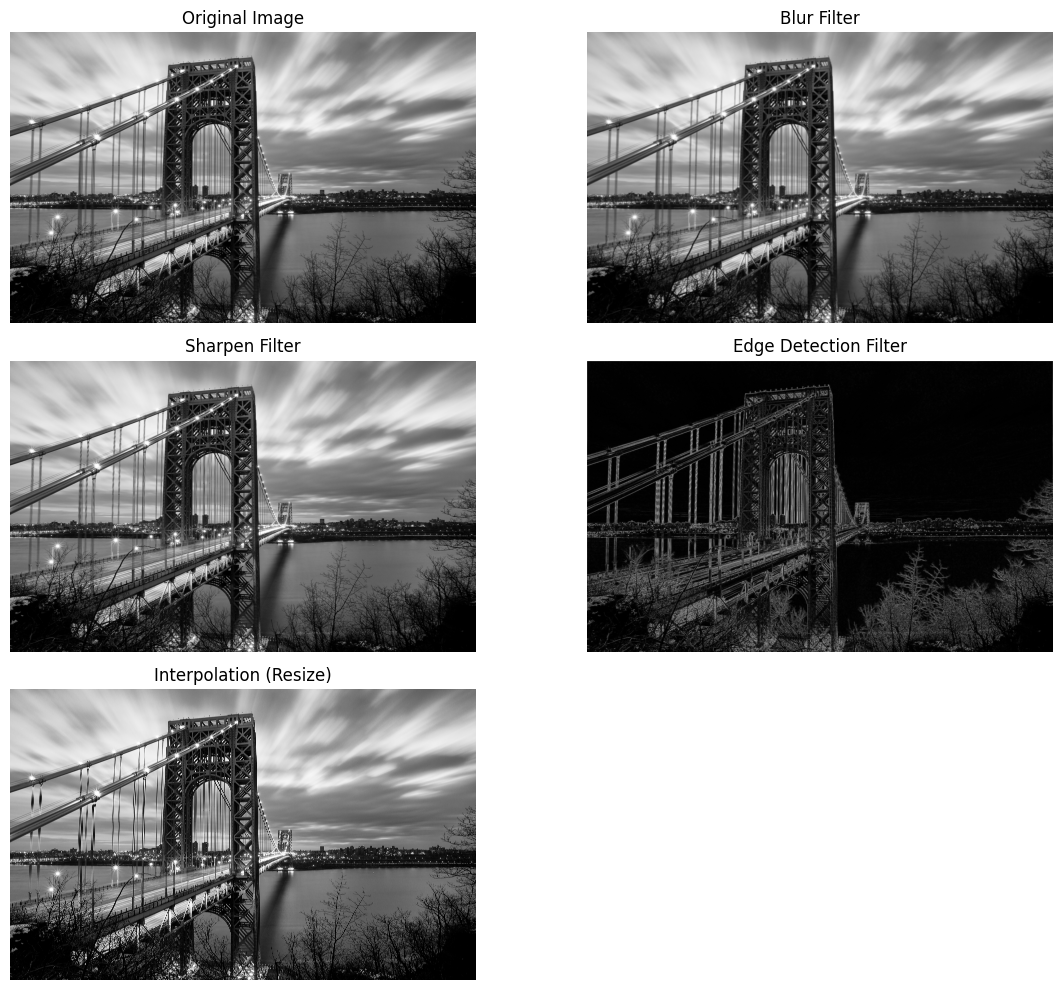

In [32]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

input_image_path = "bridge.jpg"
input_image = Image.open(input_image_path)

# Blur the image
blurred_image = input_image.filter(ImageFilter.BLUR)
blurred_image_caption = "Blur Filter"

# Sharpen the image
sharpened_image = input_image.filter(ImageFilter.SHARPEN)
sharpened_image_caption = "Sharpen Filter"

# Detect edges in the image
edge_detected_image = input_image.filter(ImageFilter.FIND_EDGES)
edge_detected_image_caption = "Edge Detection Filter"

# Interpolate the image (resize)
resized_image = input_image.resize((input_image.width * 5, input_image.height * 5), Image.BILINEAR)
resized_image_caption = "Interpolation (Resize)"

# Create a figure to display images
plt.figure(figsize=(12, 10))

# Display the original image
plt.subplot(3, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

# Display the blurred image
plt.subplot(3, 2, 2)
plt.imshow(blurred_image)
plt.title(blurred_image_caption)
plt.axis("off")

# Display the sharpened image
plt.subplot(3, 2, 3)
plt.imshow(sharpened_image)
plt.title(sharpened_image_caption)
plt.axis("off")

# Display the edge detected image
plt.subplot(3, 2, 4)
plt.imshow(edge_detected_image)
plt.title(edge_detected_image_caption)
plt.axis("off")

# Display the interpolated (resized) image
plt.subplot(3, 2, 5)
plt.imshow(resized_image)
plt.title(resized_image_caption)
plt.axis("off")

plt.tight_layout()

plt.show()


Blur Image and able to customize the kernel size

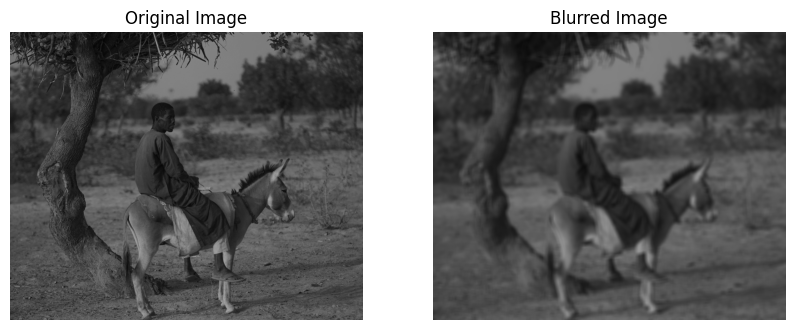

In [10]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

def blur_image(image, kernel_size=5):
    # Apply box blur
    blurred_image = image.filter(ImageFilter.BoxBlur(kernel_size))
    return blurred_image

image_name = 'low_quality.jpg'
image = Image.open(image_name)

# Blur the image
blurred_image = blur_image(image, kernel_size=20)  # change the kernel_size here

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image)
axes[1].set_title('Blurred Image')
axes[1].axis('off')

plt.show()

Blur half of image

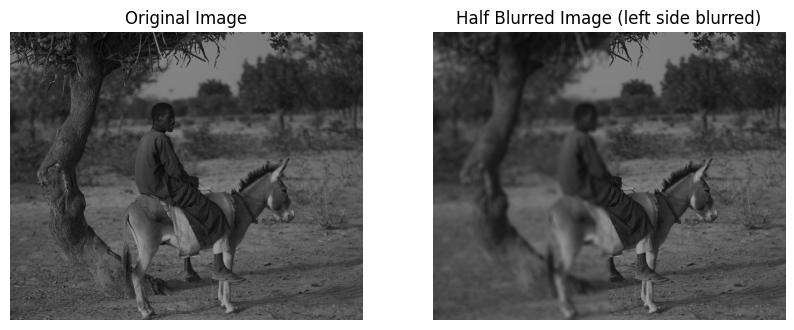

In [27]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def blur_half_image_horizontally(image, kernel_size=5):
    # Get the dimensions of the image
    width, height = image.size
    
    # Define the box region to blur (covering half of the image horizontally)
    box_region = (0, 0, width // 2, height)
    
    # Apply box blur only to the defined box region
    blurred_image = image.copy()
    blurred_image.paste(image.crop(box_region).filter(ImageFilter.BoxBlur(kernel_size)), box_region)
    
    return blurred_image

image_name = 'low_quality.jpg'
image = Image.open(image_name)

# Blur only half of the image horizontally
blurred_image = blur_half_image_horizontally(image, kernel_size=20)  # Change kernel_size

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image)
axes[1].set_title('Half Blurred Image (left side blurred)')
axes[1].axis('off')

plt.show()


Edge Detection and able to custom the sobel values

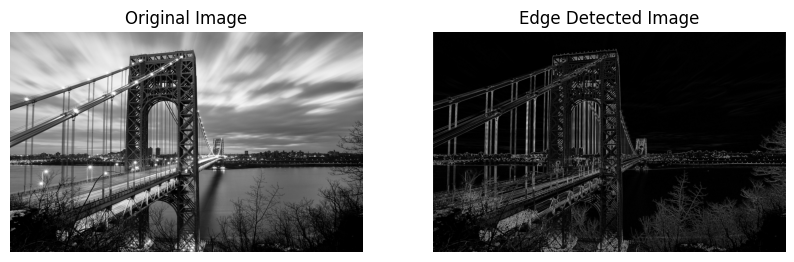

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def edge_detection(image_path):
    image = Image.open(image_path)
    grayscale_image = image.convert('L')
    
    grayscale_array = np.array(grayscale_image)
    
    # Sobel kernel can be customized
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    sobel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    # Apply Sobel filters
    sobel_x_image = convolve2d(grayscale_array, sobel_x, mode='same')
    sobel_y_image = convolve2d(grayscale_array, sobel_y, mode='same')
    
    # Calculate the gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x_image**2 + sobel_y_image**2)
    
    # Normalize the gradient magnitude to [0, 255]
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    
    # Convert the gradient magnitude array to an image
    edge_image = Image.fromarray(gradient_magnitude.astype('uint8'))
    
    return edge_image

image_path = 'bridge.jpg'
original_image = Image.open(image_path)

edge_image = edge_detection(image_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edge_image, cmap='gray')
axes[1].set_title('Edge Detected Image')
axes[1].axis('off')

plt.show()


Median blur on chess board image

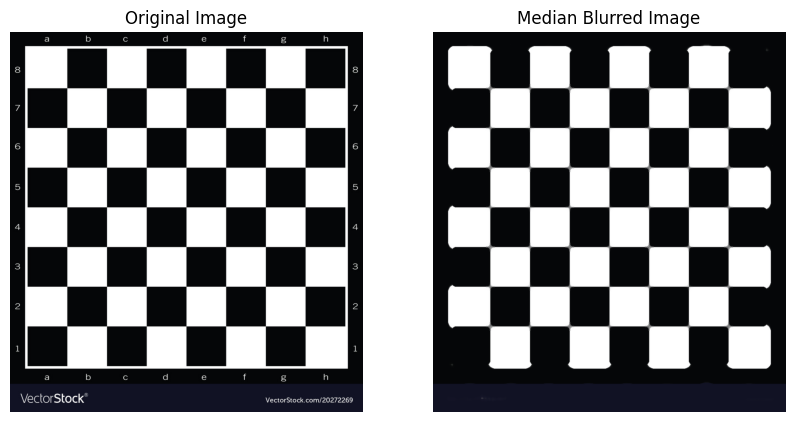

In [54]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def median_blur(image, kernel_size=3):
    # Apply median filter
    blurred_image = image.filter(ImageFilter.MedianFilter(size=kernel_size))
    return blurred_image

image_path = 'catur.jpg'
image = Image.open(image_path)

# Apply median blur with larger kernel size for more extreme effect
blurred_image = median_blur(image, kernel_size=25)  # Increase kernel size for more extreme effect

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image)
axes[1].set_title('Median Blurred Image')
axes[1].axis('off')

plt.show()